In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

In [ ]:
path = Path('/content/gdrive/MyDrive/DATASET')

In [ ]:

path.ls()

(#4) [Path('/content/gdrive/MyDrive/DATASET/NoGas'),Path('/content/gdrive/MyDrive/DATASET/Perfume'),Path('/content/gdrive/MyDrive/DATASET/Mixture'),Path('/content/gdrive/MyDrive/DATASET/Smoke')]

In [ ]:
item_tfms = RandomResizedCrop(256)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:

dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [ ]:

item_tfms = Resize(512)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls=dblock.dataloaders(path,bs=16)

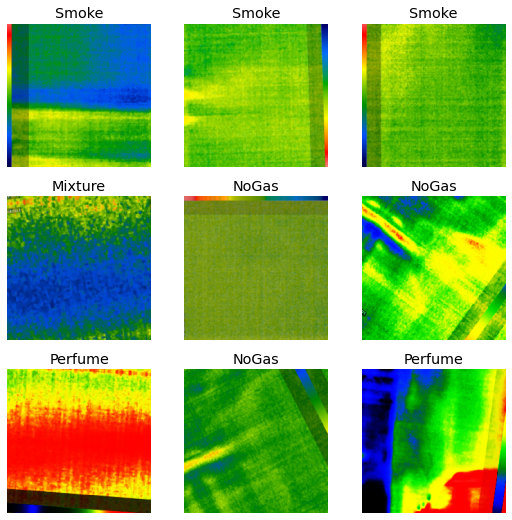

In [ ]:
dls.show_batch(max_n=9,unique=False)


In [ ]:
learn= cnn_learner(dls,resnet50, pretrained=True, metrics=[accuracy,error_rate])


SuggestedLRs(valley=0.0003981071640737355)

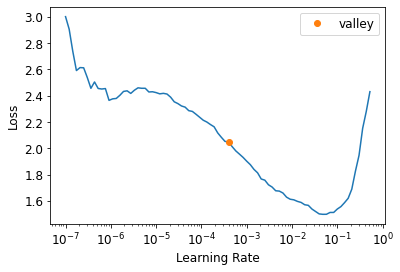

In [ ]:

learn.lr_find()


In [ ]:
learn.fine_tune(25,3.1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.862826,0.434678,0.853906,0.146094,05:59


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.539758,0.294165,0.893750,0.106250,01:57
1,0.480712,0.279198,0.886719,0.113281,02:00
2,0.428795,0.249296,0.914844,0.085156,02:00
3,0.428155,0.387968,0.817969,0.182031,01:58
4,0.458246,0.589525,0.874219,0.125781,02:00
5,0.409580,0.428426,0.810156,0.189844,01:58
6,0.422121,0.214314,0.922656,0.077344,01:59
7,0.390978,0.373415,0.875781,0.124219,01:57
8,0.335975,0.242429,0.906250,0.093750,01:58
9,0.323898,0.191498,0.934375,0.065625,01:59


In [ ]:

learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

In [ ]:
learn.recorder.plot_loss()

NameError: ignored

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)


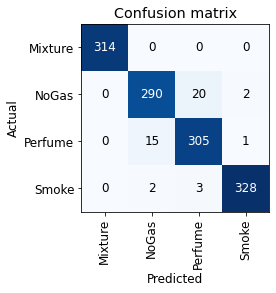

In [ ]:
interp.plot_confusion_matrix()


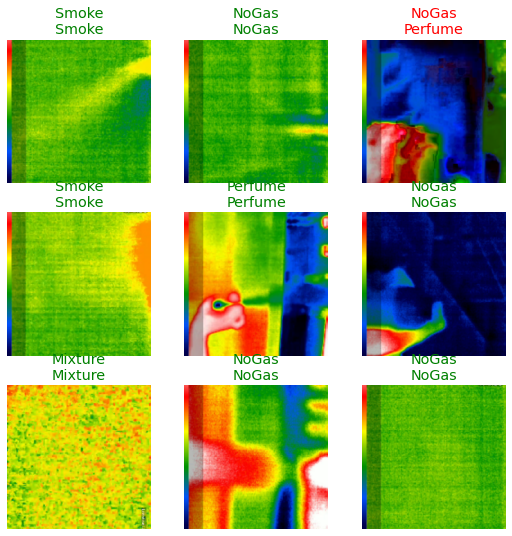

In [ ]:
learn.show_results()


In [ ]:
from fastai.vision.widgets import *
from fastai.vision.all import *
from PIL import Image, ImageOps, ImageEnhance, __version__ as PILLOW_VERSION

In [ ]:
btn_upload=widgets.FileUpload()
btn_upload

In [ ]:
img=PILImage.create(btn_upload.data[-1])
img

In [ ]:
learn.predict(img)[0]

In [ ]:
from google.colab import drive

drive.mount('/content/drive/the place of the picture')